<a href="https://colab.research.google.com/github/sangeunjj/KB_AI_2024/blob/main/0201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import warnings
warnings.filterwarnings(action='ignore') # ignore warnings

In [ ]:
## 나눔 폰트 설치
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
  fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로를 설정합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rc('font', family=font_prop.get_name())

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


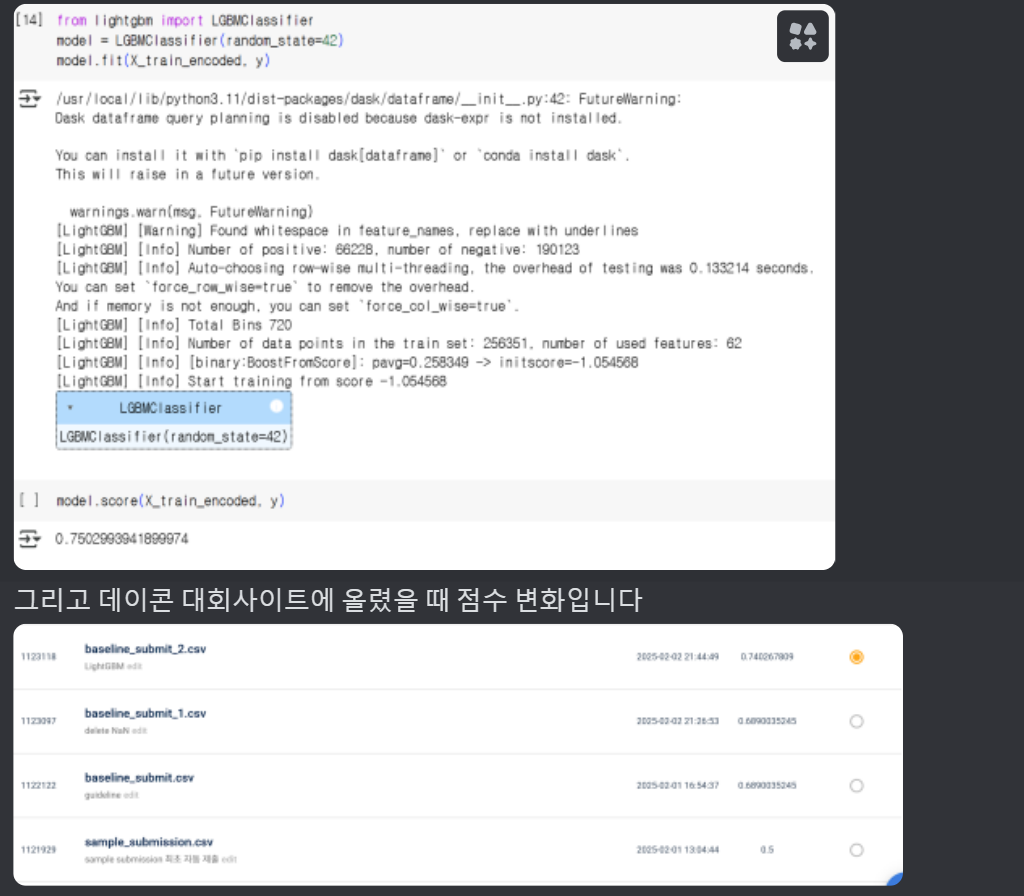

## DATA LOAD

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/2025/lgaimers/train.csv').drop(columns=['ID'])
test = pd.read_csv('/content/drive/MyDrive/2025/lgaimers/test.csv').drop(columns=['ID'])
#sample = pd.read_csv('/content/drive/MyDrive/2025/lgaimers/sample_submission.csv')

In [ ]:
train.head(5)

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [ ]:
train['임신 성공 여부'].value_counts() # 약 3:1의 비율로 극단적이진 않지만, 고려 필요

,count
임신 성공 여부,
0,190123
1,66228


## EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

In [ ]:
train.isnull().sum().sort_values()

,0
시술 시기 코드,0
불임 원인 - 정자 농도,0
불임 원인 - 정자 면역학적 요인,0
불임 원인 - 정자 운동성,0
불임 원인 - 정자 형태,0
...,...
임신 시도 또는 마지막 임신 경과 연수,246981
착상 전 유전 검사 사용 여부,253633
PGD 시술 여부,254172
PGS 시술 여부,254422


In [ ]:
# 결측치 개수 및 비율 확인(80% 이상의 값이 결측치인 변수 6개는 제외)
missing_values = train.isnull().sum()
missing_percentage = (train.isnull().sum() / len(train)) * 100

missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
print(missing_df[missing_df["Missing Values"] > 0].sort_values(by="Percentage", ascending=False))

                       Missing Values  Percentage
난자 해동 경과일                      254915   99.439831
PGS 시술 여부                      254422   99.247516
PGD 시술 여부                      254172   99.149994
착상 전 유전 검사 사용 여부               253633   98.939735
임신 시도 또는 마지막 임신 경과 연수          246981   96.344855
배아 해동 경과일                      215982   84.252451
난자 채취 경과일                       57488   22.425503
난자 혼합 경과일                       53735   20.961494
배아 이식 경과일                       43566   16.994667
총 생성 배아 수                        6291    2.454057
기증자 정자와 혼합된 난자 수                 6291    2.454057
단일 배아 이식 여부                      6291    2.454057
착상 전 유전 진단 사용 여부                 6291    2.454057
배아 생성 주요 이유                      6291    2.454057
대리모 여부                           6291    2.454057
기증 배아 사용 여부                      6291    2.454057
신선 배아 사용 여부                      6291    2.454057
동결 배아 사용 여부                      6291    2.454057
파트너 정자와 혼합된 난자 수                 6291    2.454057


In [ ]:
categorical_columns = [
    "시술 시기 코드",
    "시술 당시 나이",
    "시술 유형",
    "특정 시술 유형",
    "배란 자극 여부",
    "배란 유도 유형",
    "단일 배아 이식 여부",
    "착상 전 유전 검사 사용 여부",
    "착상 전 유전 진단 사용 여부",
    "남성 주 불임 원인",
    "남성 부 불임 원인",
    "여성 주 불임 원인",
    "여성 부 불임 원인",
    "부부 주 불임 원인",
    "부부 부 불임 원인",
    "불명확 불임 원인",
    "불임 원인 - 난관 질환",
    "불임 원인 - 남성 요인",
    "불임 원인 - 배란 장애",
    "불임 원인 - 여성 요인",
    "불임 원인 - 자궁경부 문제",
    "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도",
    "불임 원인 - 정자 면역학적 요인",
    "불임 원인 - 정자 운동성",
    "불임 원인 - 정자 형태",
    "배아 생성 주요 이유",
    "총 시술 횟수",
    "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수",
    "DI 시술 횟수",
    "총 임신 횟수",
    "IVF 임신 횟수",
    "DI 임신 횟수",
    "총 출산 횟수",
    "IVF 출산 횟수",
    "DI 출산 횟수",
    "난자 출처",
    "정자 출처",
    "난자 기증자 나이",
    "정자 기증자 나이",
    "동결 배아 사용 여부",
    "신선 배아 사용 여부",
    "기증 배아 사용 여부",
    "대리모 여부",
    "PGD 시술 여부",
    "PGS 시술 여부"
]

In [ ]:
train[categorical_columns+['임신 성공 여부']].head(3)

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,...,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,임신 성공 여부
0,TRZKPL,만18-34세,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,...,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0
1,TRYBLT,만45-50세,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,...,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,...,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0


In [ ]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수",
    "총 생성 배아 수",
    "미세주입된 난자 수",
    "미세주입에서 생성된 배아 수",
    "이식된 배아 수",
    "미세주입 배아 이식 수",
    "저장된 배아 수",
    "미세주입 후 저장된 배아 수",
    "해동된 배아 수",
    "해동 난자 수",
    "수집된 신선 난자 수",
    "저장된 신선 난자 수",
    "혼합된 난자 수",
    "파트너 정자와 혼합된 난자 수",
    "기증자 정자와 혼합된 난자 수",
    "난자 채취 경과일",
    "난자 해동 경과일",
    "난자 혼합 경과일",
    "배아 이식 경과일",
    "배아 해동 경과일"
]

In [ ]:
train[numeric_columns+['임신 성공 여부']].head(3)

,임신 시도 또는 마지막 임신 경과 연수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,...,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,NaN,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,...,0.0,5.0,5.0,0.0,0.0,NaN,0.0,3.0,NaN,0
1,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,NaN,0.0,NaN,NaN,0
2,NaN,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,7.0,0.0,0.0,NaN,0.0,2.0,NaN,0


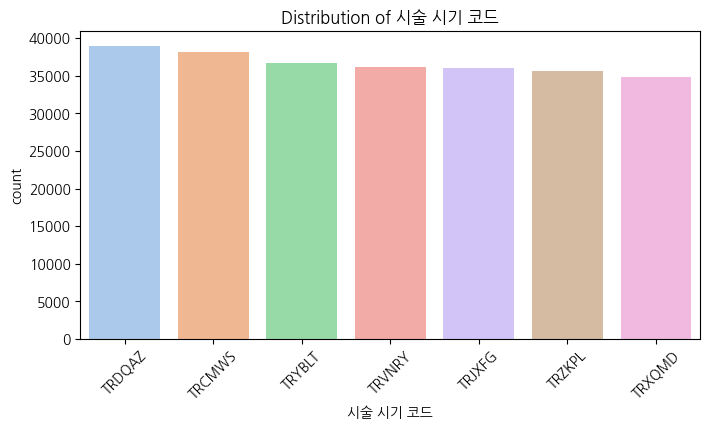

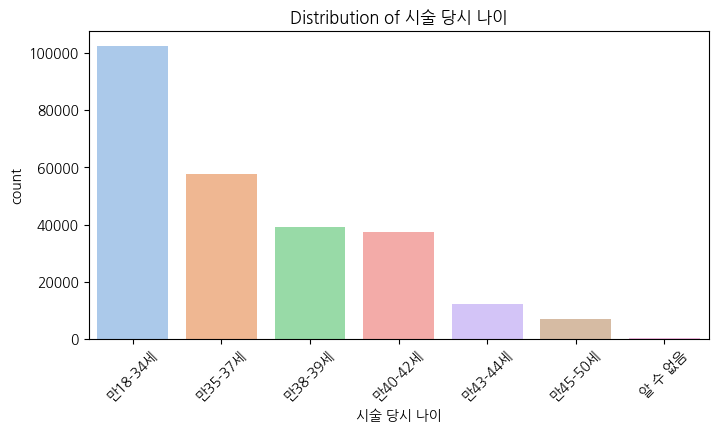

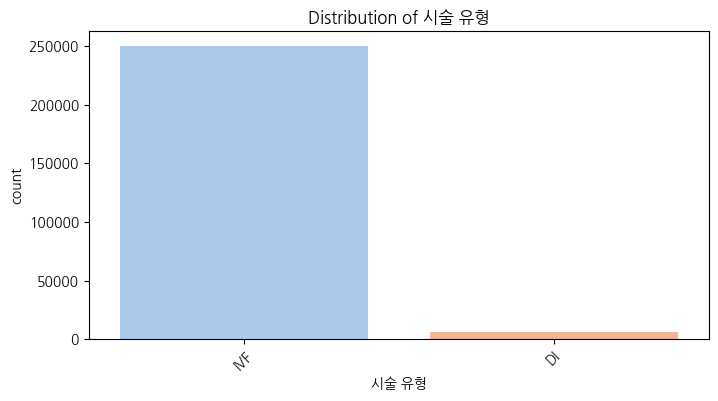

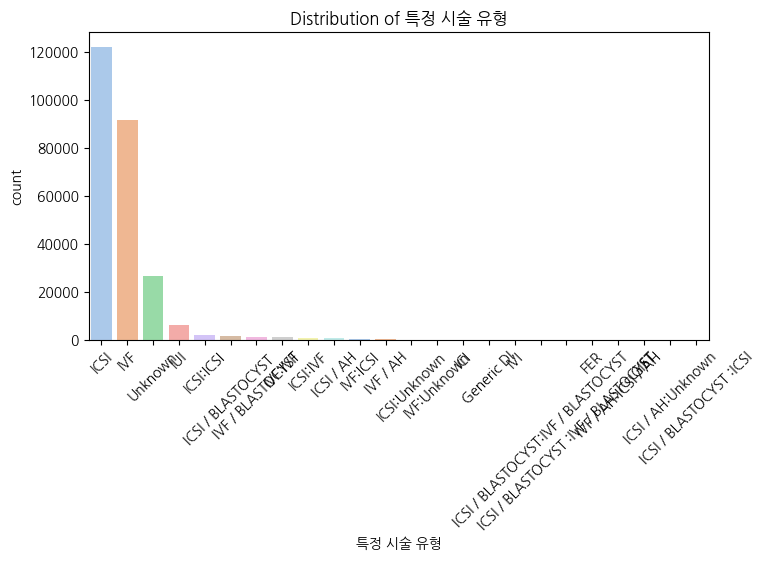

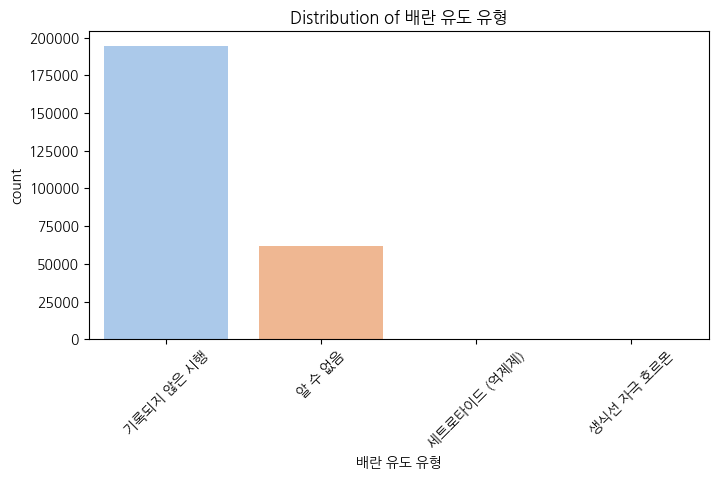

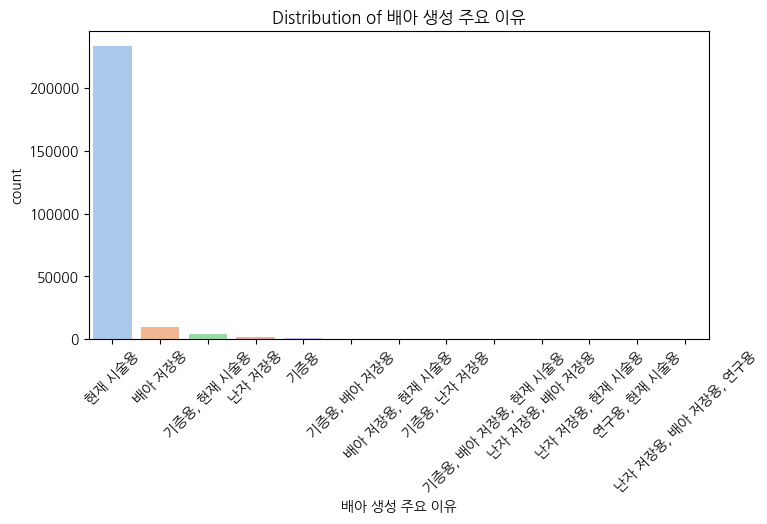

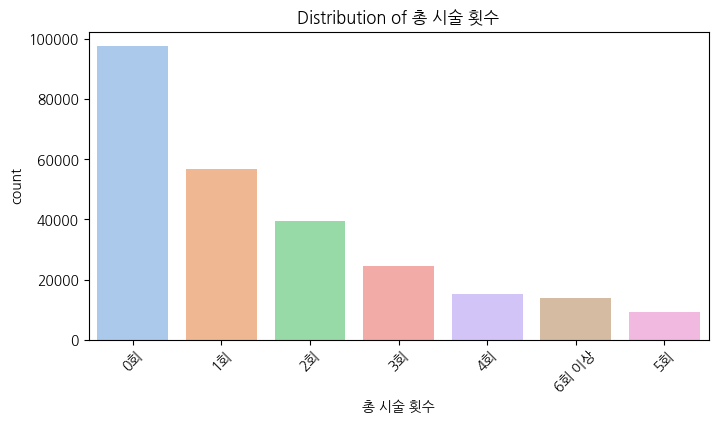

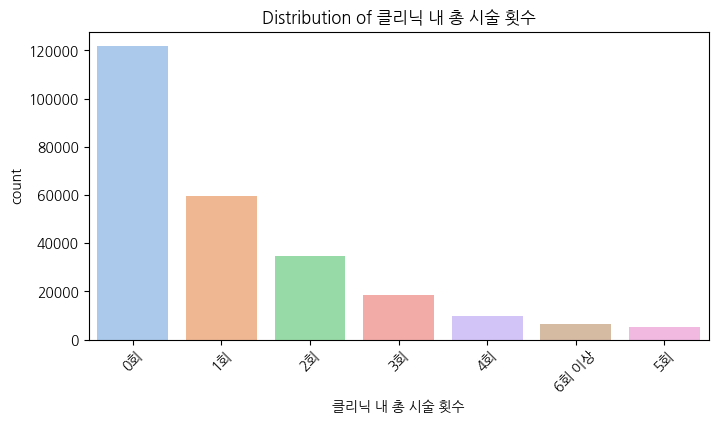

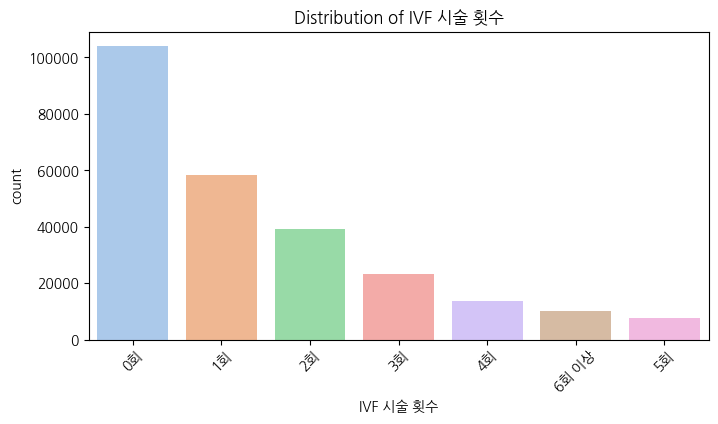

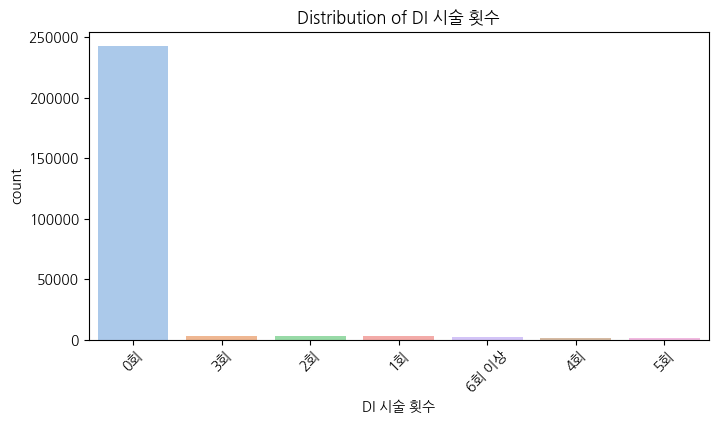

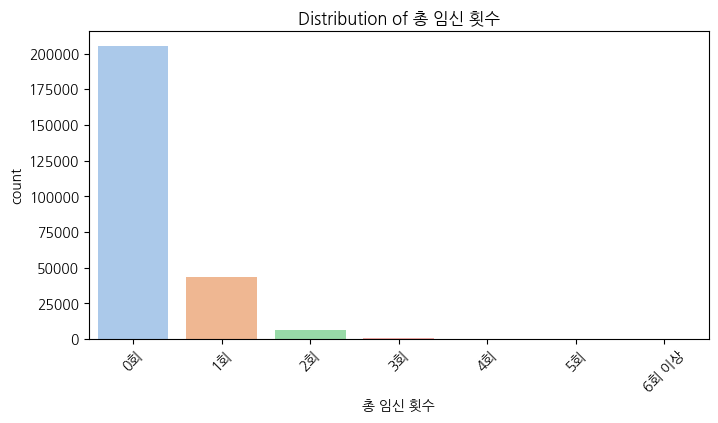

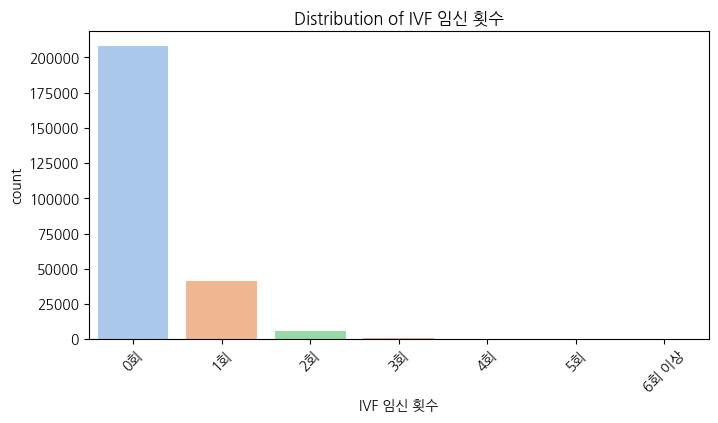

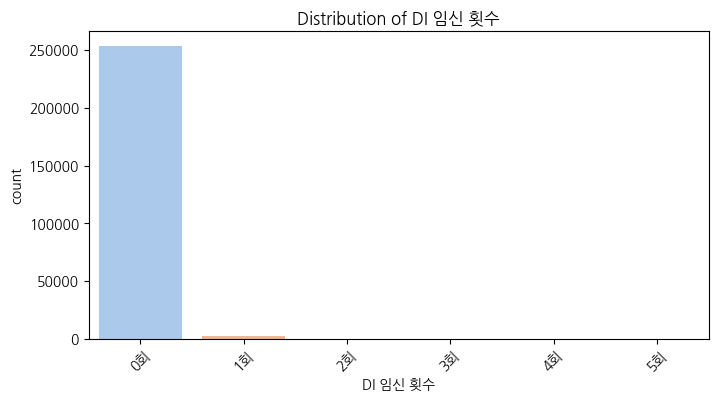

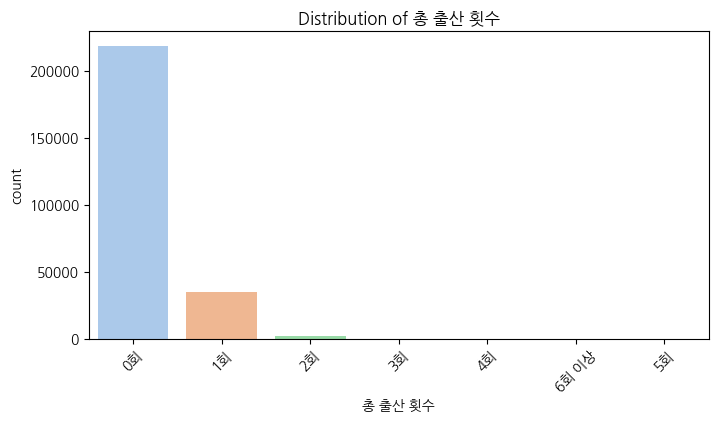

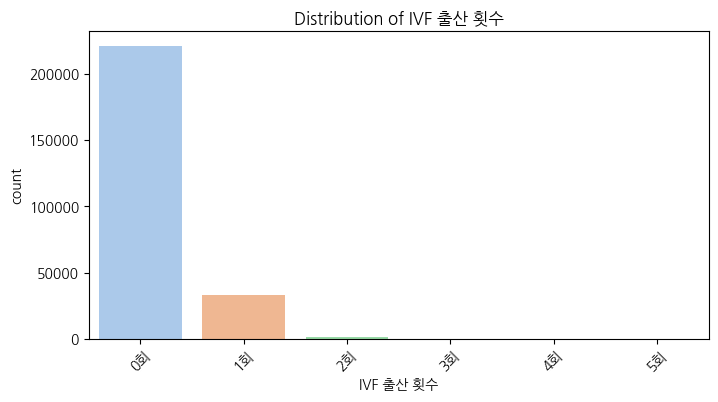

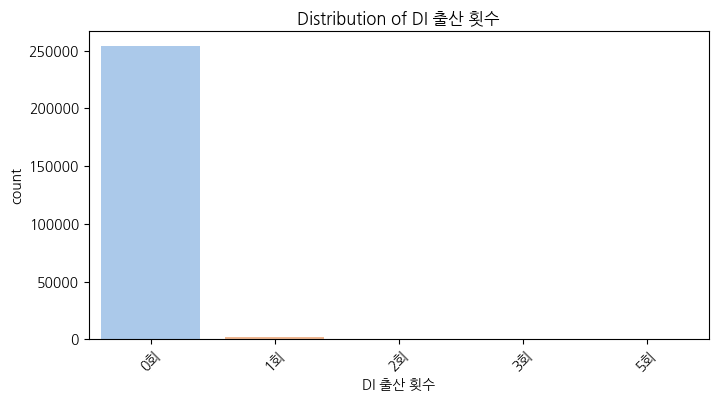

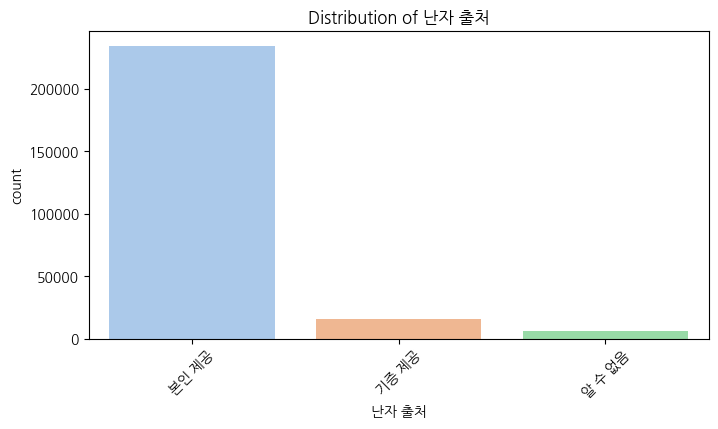

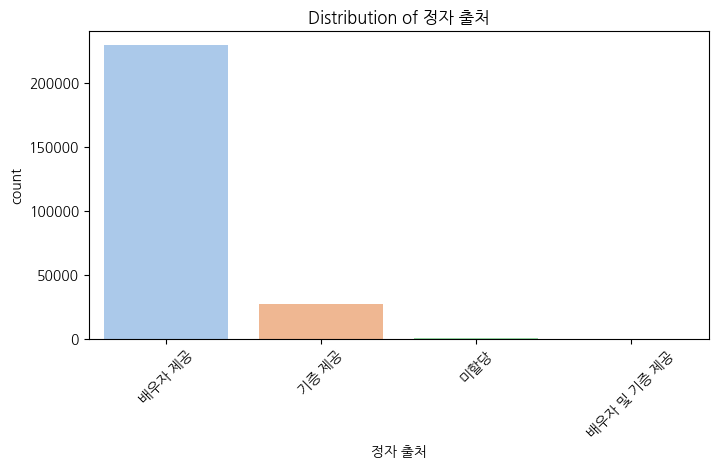

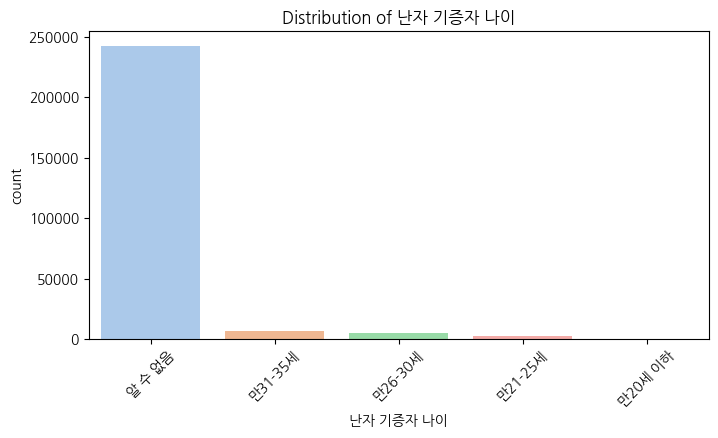

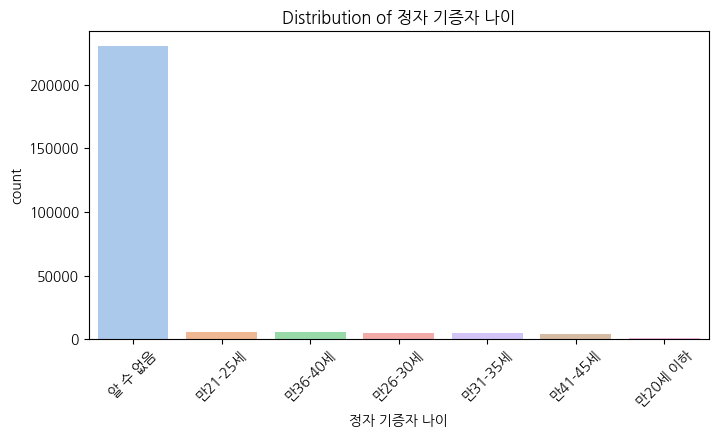

In [ ]:
#범주형 변수 분포 확인
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=train, palette="pastel", order=train[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


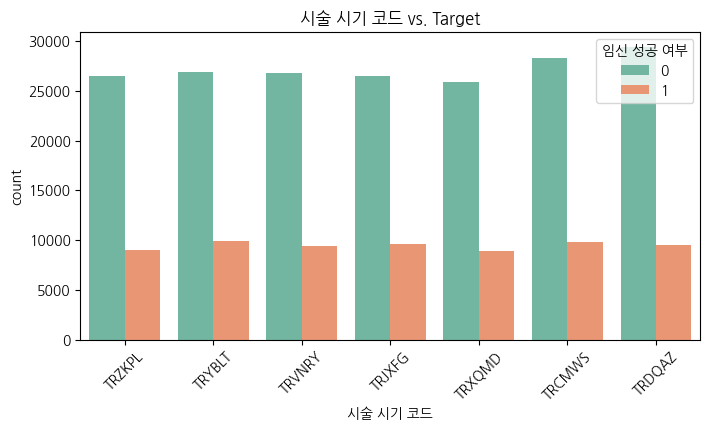

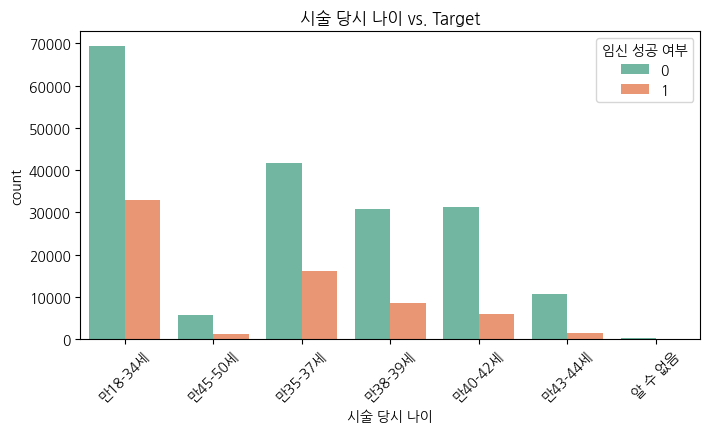

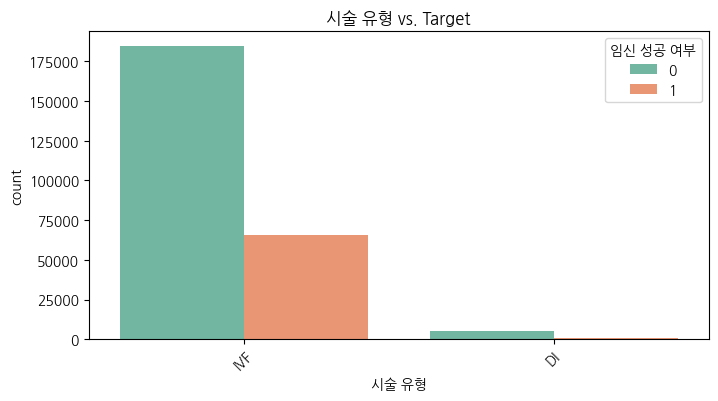

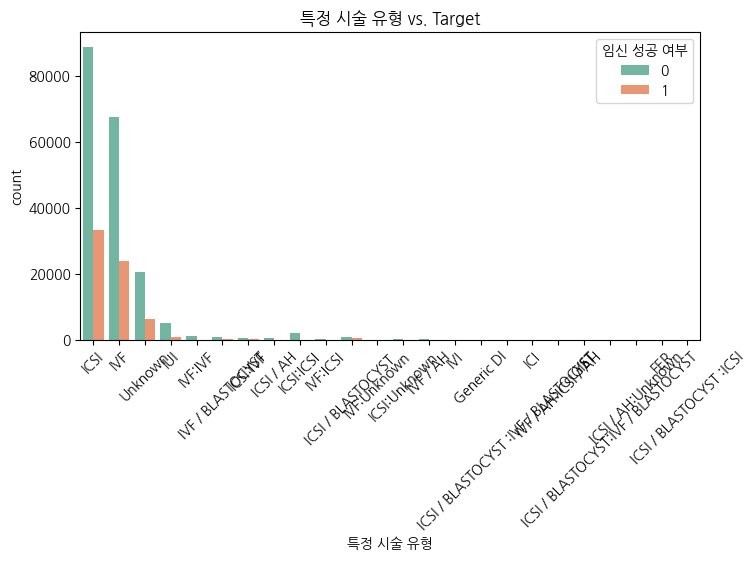

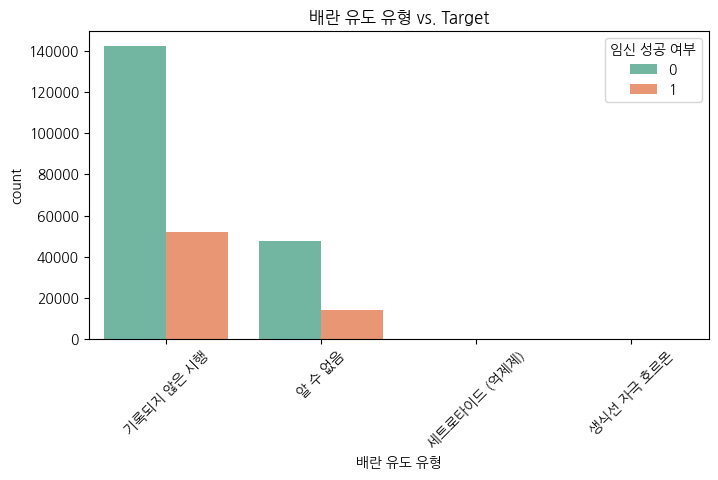

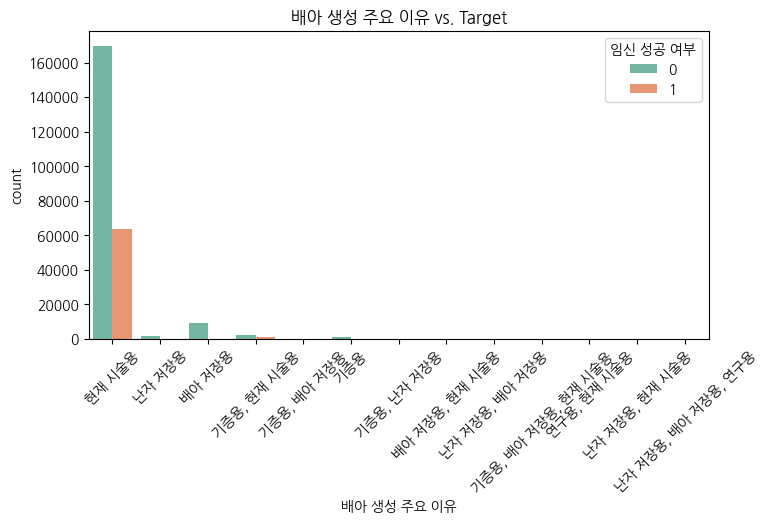

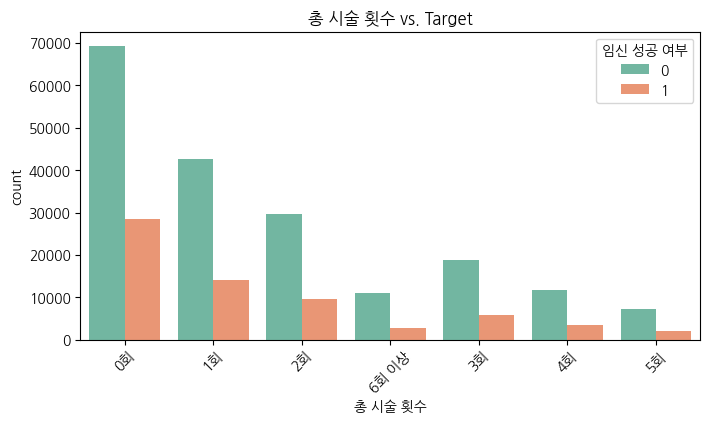

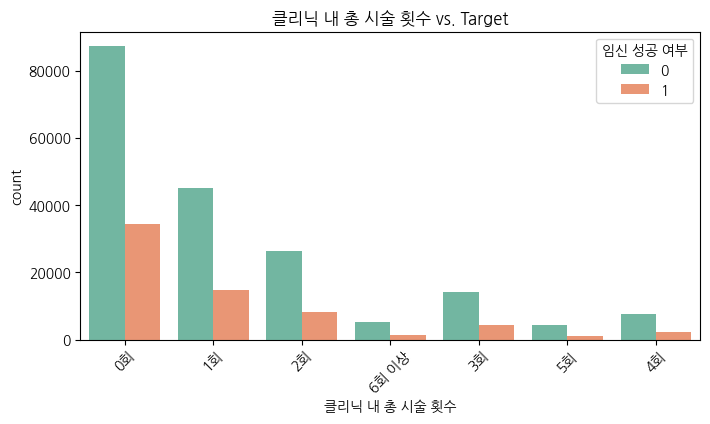

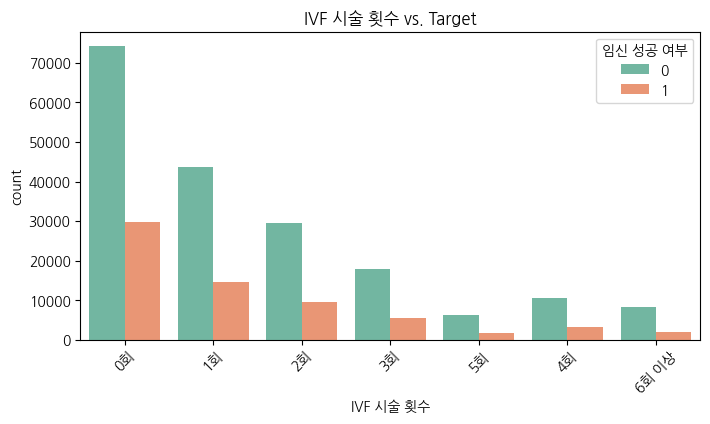

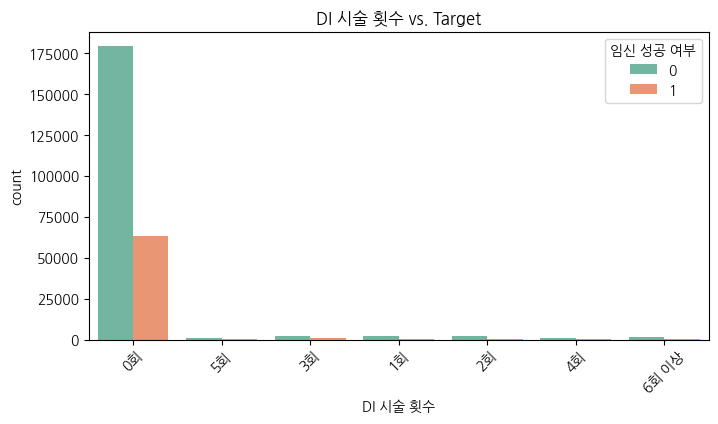

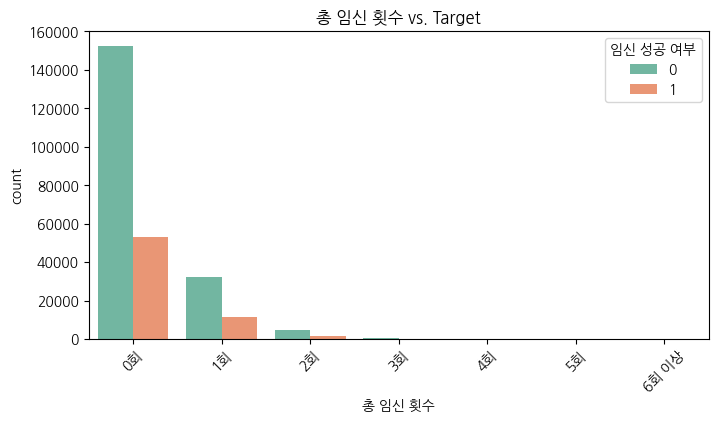

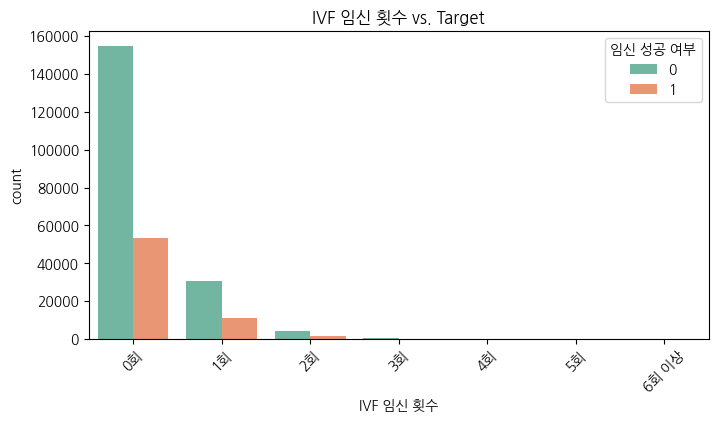

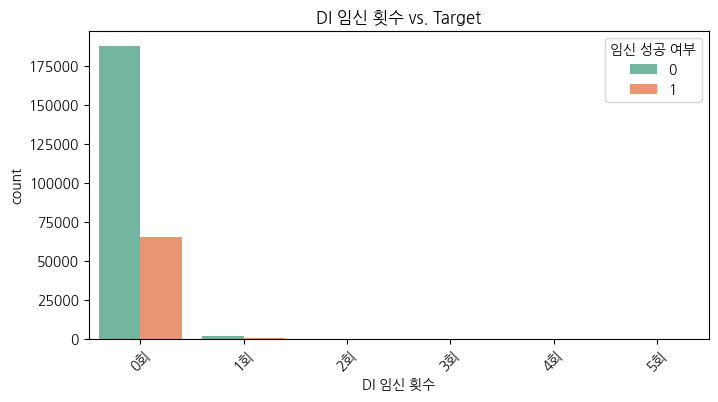

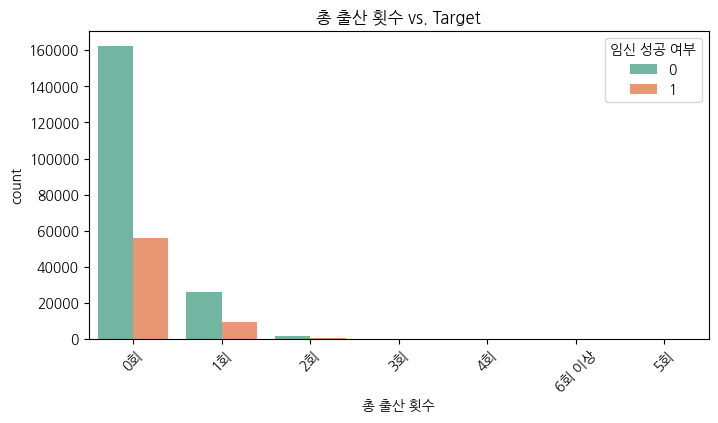

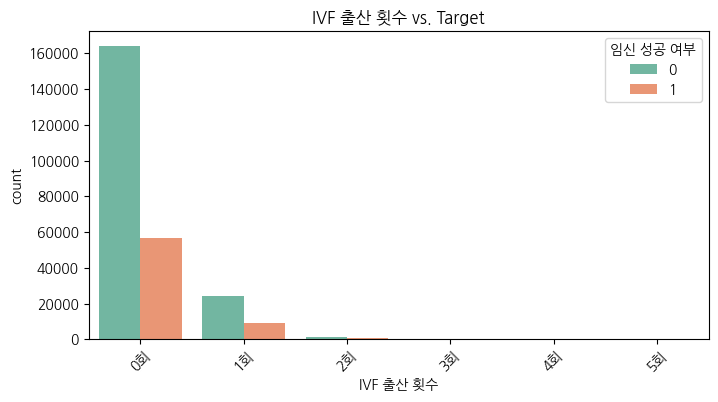

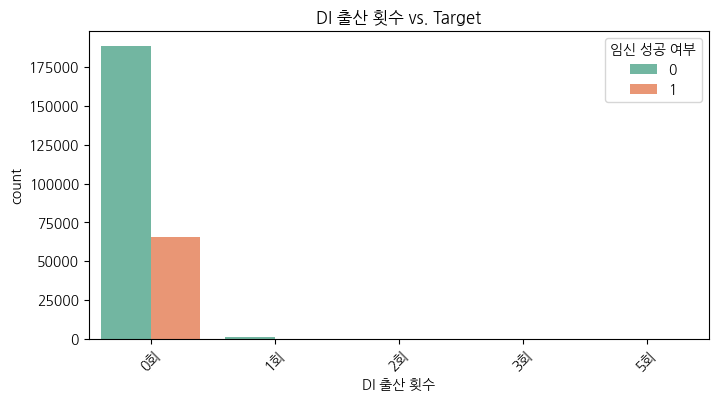

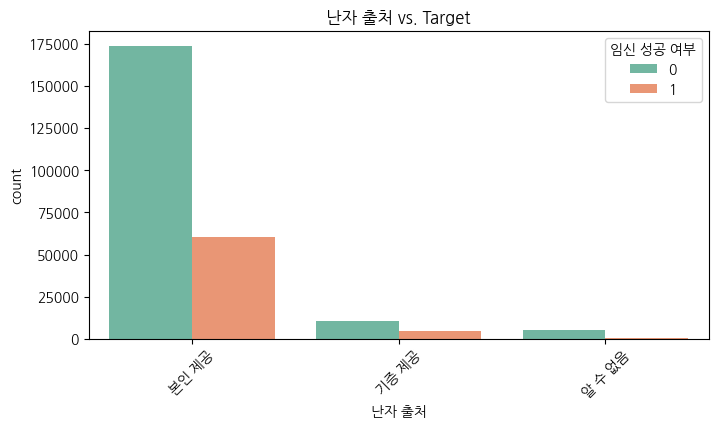

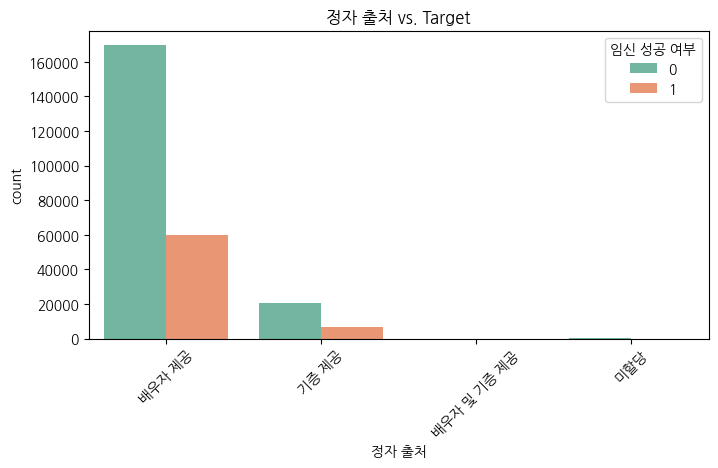

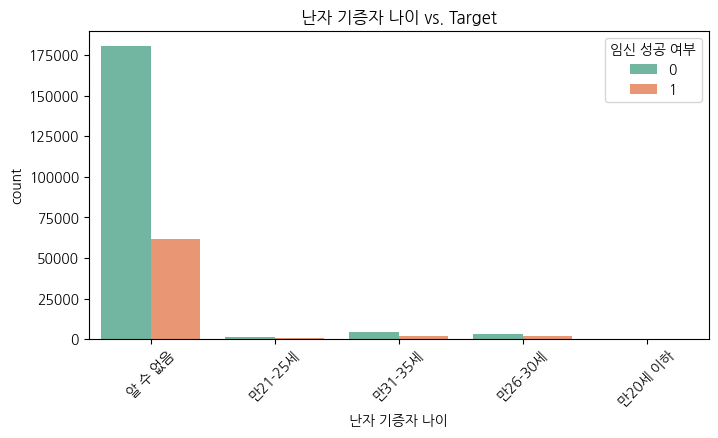

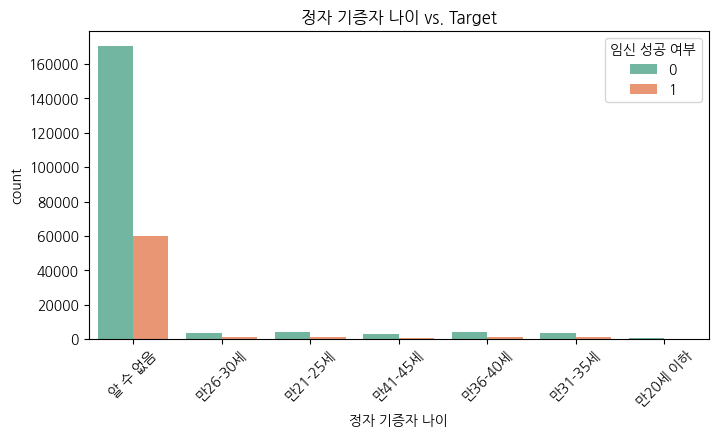

In [ ]:
#범주형 변수와 임신 성공 여부 관계 확인
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='임신 성공 여부', data=train, palette="Set2")
    plt.title(f"{col} vs. Target")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
train[numeric_columns].describe() # 일부 변수에 대해서는 이상치 제거 필요

,임신 시도 또는 마지막 임신 경과 연수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일
count,9370.000000,250060.000000,250060.000000,250060.00000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,198863.0,1436.000000,202616.000000,212785.000000,40369.000000
mean,9.270651,5.061145,4.170799,2.84365,1.368156,0.724718,1.185975,0.612933,0.454571,0.046401,8.563717,0.093418,7.698928,7.107326,0.534728,0.0,0.001393,0.005385,3.254741,0.045629
std,3.550313,4.664337,5.625943,4.09464,0.771961,0.894352,2.502318,1.842522,1.415320,0.688246,7.317230,1.105882,6.451914,6.532466,2.509487,0.0,0.037307,0.111504,1.715697,0.418672
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000
50%,9.000000,4.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.000000,6.000000,0.000000,0.0,0.000000,0.000000,3.000000,0.000000
75%,11.000000,8.000000,7.000000,5.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,13.000000,0.000000,11.000000,11.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.000000
max,20.000000,51.000000,51.000000,43.00000,3.000000,3.000000,51.000000,51.000000,32.000000,36.000000,51.000000,51.000000,51.000000,51.000000,50.000000,0.0,1.000000,7.000000,7.000000,7.000000


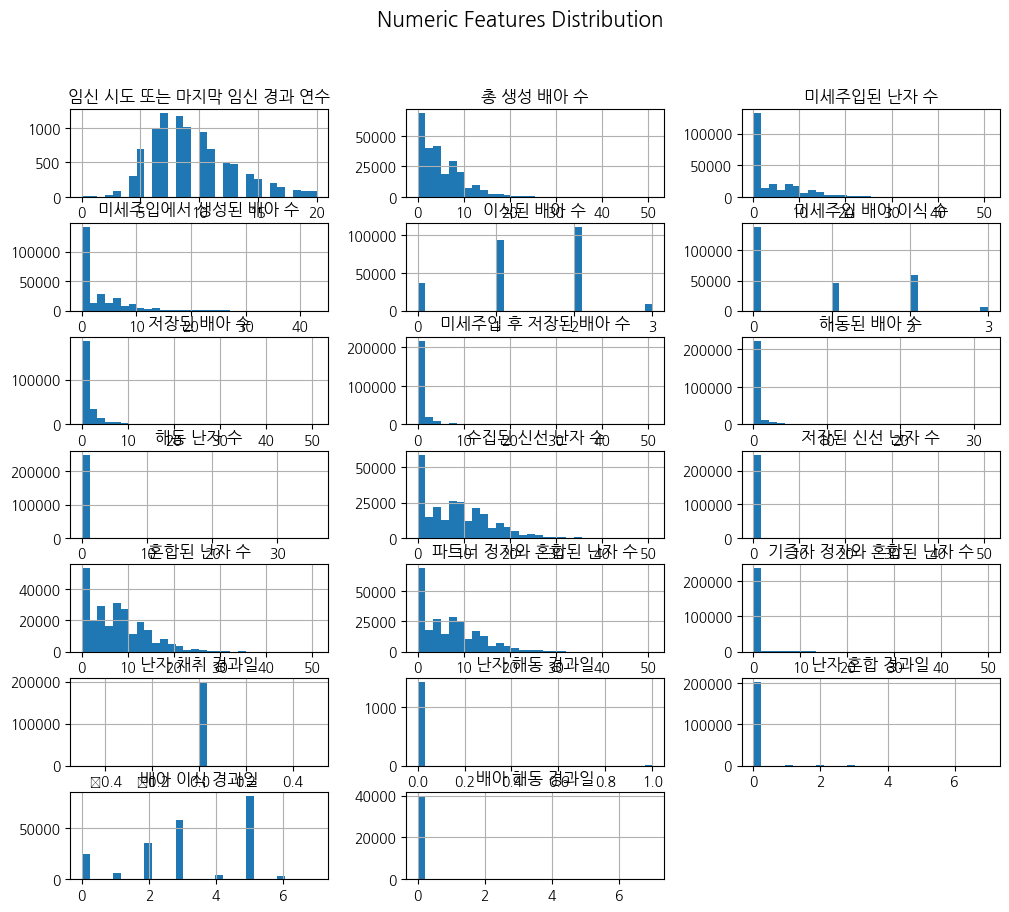

In [ ]:
#수치형 변수 분포 확인
train[numeric_columns].hist(figsize=(12, 10), bins=30, layout=(7, 3))  # 변수 수에 맞게 layout 조정
plt.suptitle("Numeric Features Distribution", fontsize=15)
plt.show()

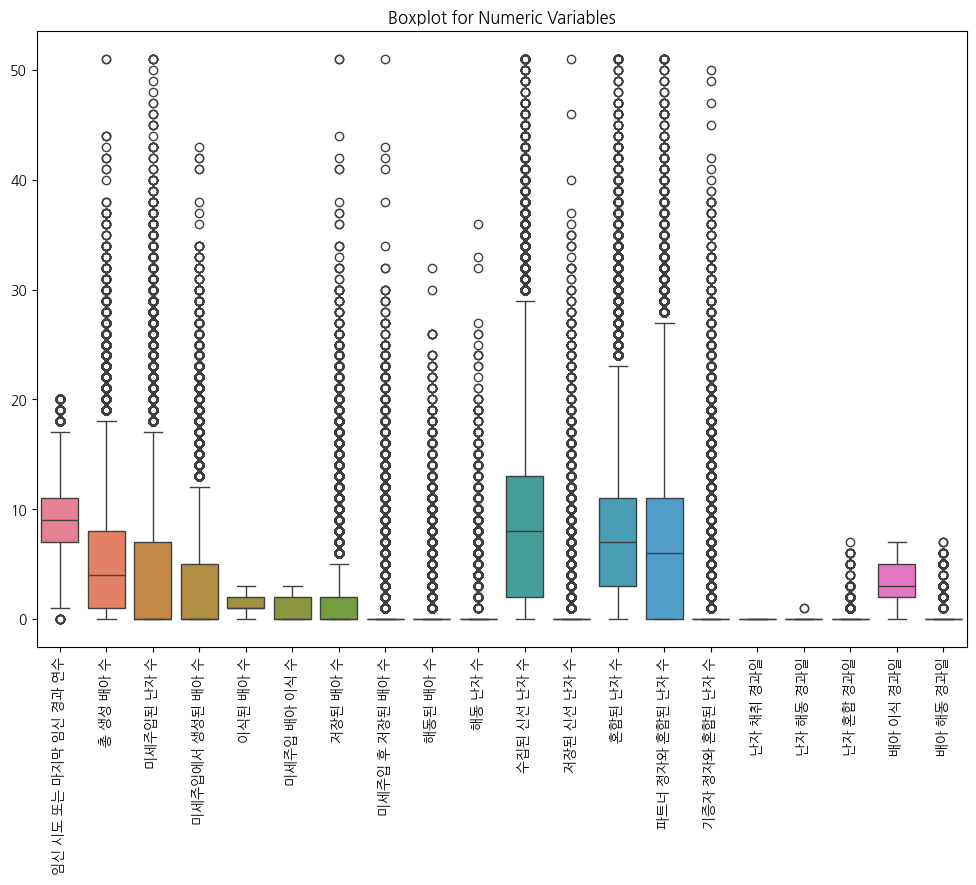

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=train[numeric_columns])
plt.xticks(rotation=90)
plt.title("Boxplot for Numeric Variables")
plt.show()

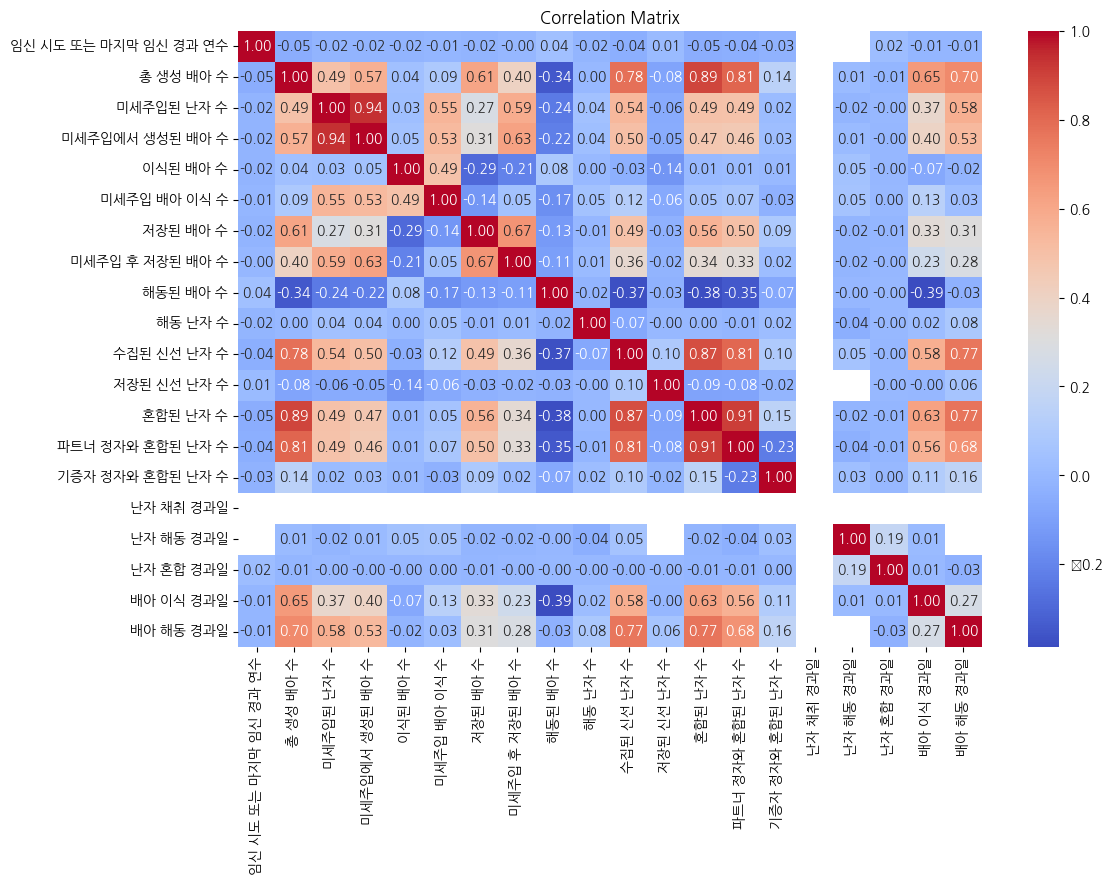

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(train[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## TRAIN

In [ ]:
# 카테고리형 컬럼들을 문자열로 변환
for col in categorical_columns:
    X[col] = X[col].astype(str)
    test[col] = test[col].astype(str)

In [ ]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_train_encoded = X.copy()
X_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

X_test_encoded = test.copy()
X_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

In [ ]:
X_train_encoded[numeric_columns] = X_train_encoded[numeric_columns].fillna(0)
X_test_encoded[numeric_columns] = X_test_encoded[numeric_columns].fillna(0)

In [ ]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train_encoded, y)

ExtraTreesClassifier(random_state=42)

In [ ]:
pred_proba = model.predict_proba(X_test_encoded)[:, 1]

In [ ]:
sample_submission = pd.read_csv('/content/drive/MyDrive/2025/lgaimers/sample_submission.csv')
sample_submission['probability'] = pred_proba

In [ ]:
sample_submission.to_csv('./baseline_submit.csv', index=False)

In [ ]:
sample_submission['probability'].value_counts()

,count
probability,
0.000,12193
0.010,2295
0.020,1577
0.160,1469
0.200,1457
...,...
0.505,1
0.365,1
0.395,1
